In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from correlation_ansatzs import high_temp_correlation,low_temp_correlation,low_temp_correlation_1,critical_correlation,loglog
from HOTRGZ2 import get_lattice_size,get_dist_torus_2D
import matplotlib as mpl

with GILT
fitted parameters: [0.70224786 0.13003305]
fitted equation: 7.02e-01x^(-2 Δ),Δ=0.1300
without GILT
fitted parameters: [0.72560656 0.13126661]
fitted equation: 7.26e-01x^(-2 Δ),Δ=0.1313
with GILT, 00
fitted parameters: [0.65733225 0.22910154]
fitted equation: 6.57e-01x^(-2 Δ),Δ=0.2291
without GILT, 00
fitted parameters: [0.7400836  0.11651222]
fitted equation: 7.40e-01x^(-2 Δ),Δ=0.1165


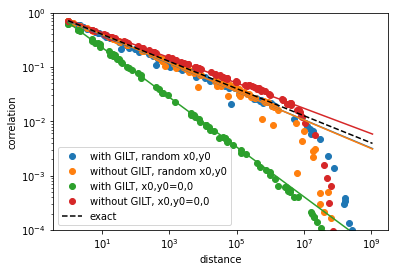

In [10]:
data1=pd.read_pickle('data/hotrg_gilt_X24_correlation.pkl')
data2=pd.read_pickle('data/hotrg_X24_correlation.pkl')
data3=pd.read_pickle('data/hotrg_gilt_X24_correlation_00.pkl')
data4=pd.read_pickle('data/hotrg_X24_correlation_00.pkl')

def process_data(data):
    lattice_size=get_lattice_size(60,spacial_dim=2)
    data['x']=data.apply(lambda row:row['x1']-row['x0'],axis=1)
    data['y']=data.apply(lambda row:row['y1']-row['y0'],axis=1)
    data['dist']=data.apply(lambda row:get_dist_torus_2D(row['x'],row['y'],lattice_size),axis=1)
    data['theta']=data.apply(lambda row:np.arctan2(row['y'],row['x']),axis=1)
    data=data.sort_values(by=['dist'])
    return data
data1=process_data(data1)
data2=process_data(data2)
data3=process_data(data3)
data4=process_data(data4)

def fit_data(data,ansatz):
    data_slice=data[(data['correlation']>1e-2)].sort_values('dist')
    p,cov=curve_fit(loglog(ansatz),np.log(data_slice['dist']),np.log(data_slice['correlation']),p0=ansatz.p0,maxfev=10000)
    print('fitted parameters:',p)
    print('fitted equation:',ansatz.eq.format(*p))
    return p,cov,ansatz

print('with GILT')
p1,cov1,ansatz1=fit_data(data1,critical_correlation)

print('without GILT')
p2,cov2,ansatz2=fit_data(data2,critical_correlation)

print('with GILT, 00')
p3,cov3,ansatz3=fit_data(data3,critical_correlation)

print('without GILT, 00')
p4,cov4,ansatz4=fit_data(data4,critical_correlation)

pexp=(0.71,0.125)

plt.figure(figsize=(6,4))

ls=np.geomspace(1,2**30)

plt.plot(data1['dist'],data1['correlation'],'o',label='with GILT, random x0,y0',color='C0')
plt.plot(data2['dist'],data2['correlation'],'o',label='without GILT, random x0,y0',color='C1')
plt.plot(data3['dist'],data3['correlation'],'o',label='with GILT, x0,y0=0,0',color='C2')
plt.plot(data4['dist'],data4['correlation'],'o',label='without GILT, x0,y0=0,0',color='C3')

plt.plot(ls,ansatz1(ls,*p1),'-',color='C0')
plt.plot(ls,ansatz2(ls,*p2),'-',color='C1')
plt.plot(ls,ansatz3(ls,*p3),'-',color='C2')
plt.plot(ls,ansatz4(ls,*p4),'-',color='C3')
plt.plot(ls,ansatz4(ls,*pexp),'--',color='black',label='exact')



plt.xscale('log')
plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('correlation')
plt.ylim([1e-4,1])
plt.legend()
plt.show()


critical temperature
fitted parameters: [0.70224786 0.13003305]
fitted equation: 7.02e-01x^(-2 Δ),Δ=0.1300
high temperature
fitted parameters: [6.83511836e-01 2.06525368e+04 1.35546351e-01]
fitted equation: 6.84e-01e^(-x/ζ)/x^(2 Δ),ζ=2.07e+04,Δ=0.1355
low temperature
fitted parameters: [7.00562688e-01 1.95100231e+03 1.29427513e-01]
fitted equation: 7.01e-01(1/ζ+1/x)^(2 ∆),ζ=1.95e+03,∆=0.1294
with GILT


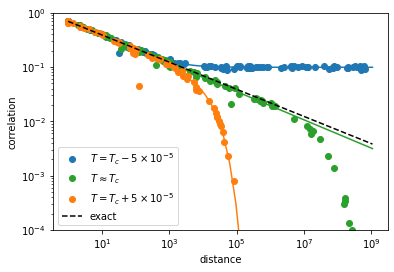

In [12]:
data1=pd.read_pickle('data/hotrg_gilt_X24_correlation.pkl')
data1=process_data(data1)
print('critical temperature')
p1,cov1,ansatz1=fit_data(data1,critical_correlation)
data2=pd.read_pickle('data/hotrg_gilt_X24_lowB_correlation.pkl')
data2=process_data(data2)
print('high temperature')
p2,cov2,ansatz2=fit_data(data2,high_temp_correlation)
data3=pd.read_pickle('data/hotrg_gilt_X24_highB_correlation.pkl')
data3=process_data(data3)
print('low temperature')
p3,cov3,ansatz3=fit_data(data3,low_temp_correlation_1)
pexp=(0.69,0.125)

print('with GILT')

ls=np.geomspace(1,2**30)

plt.figure(figsize=(6,4))
plt.plot(ls,ansatz3(ls,*p3),'-',color='tab:blue')
plt.plot(ls,ansatz1(ls,*p1),'-',color='tab:green')
plt.plot(ls,ansatz2(ls,*p2),'-',color='tab:orange')
plt.plot(data3['dist'],data3['correlation'],'o',label=r'$T=T_c-5\times10^{-5}$',color='tab:blue')
plt.plot(data1['dist'],data1['correlation'],'o',label=r'$T \approx T_c$',color='tab:green')
plt.plot(data2['dist'],data2['correlation'],'o',label=r'$T=T_c+5\times10^{-5}$',color='tab:orange')
plt.plot(ls,ansatz4(ls,*pexp),'--',color='black',label='exact')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('distance')
plt.ylabel('correlation')
plt.ylim([1e-4,1])
plt.legend()
plt.show()



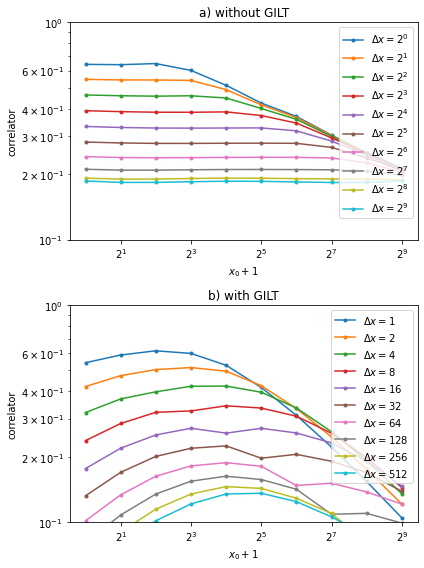

In [54]:
plt.figure(figsize=(6,8))

data=pd.read_pickle('data/hotrg_X24_smearing_between_edge_10.pkl')
data['start']=data['x0']+1
data['dist']=data['x1']-data['x0']
data['size']=np.maximum(data['start'],data['dist'])

plt.subplot(211)
for dist in sorted(set(data['dist'])):
    data_sel=data[data['dist']==dist]
    plt.plot(data_sel['start'],data_sel['correlation'],'.-',label=r'$\Delta x=2^{'+str(int(np.log2(dist)))+r'}$')
plt.legend(loc='upper right')
plt.xlabel('$x_0+1$')
plt.ylabel('correlator')
plt.ylim([.1,1])
plt.xscale(mpl.scale.LogScale('x',base=2))
plt.yscale('log')
plt.title('a) without GILT')



data=pd.read_pickle('data/hotrg_gilt_X24_smearing_between_edge_10.pkl')
data['start']=data['x0']+1
data['dist']=data['x1']-data['x0']
data['size']=np.maximum(data['start'],data['dist'])

ax=plt.subplot(212)
for dist in sorted(set(data['dist'])):
    data_sel=data[data['dist']==dist]
    plt.plot(data_sel['start'],data_sel['correlation'],'.-',label=r'$\Delta x=$'+str(dist))
plt.legend(loc='upper right')

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),ncol=5)
plt.xlabel('$x_0+1$')
plt.ylabel('correlator')
plt.ylim([.1,1])
plt.xscale(mpl.scale.LogScale('x',base=2))
plt.yscale('log')
plt.title('b) with GILT')



plt.tight_layout()
plt.show()

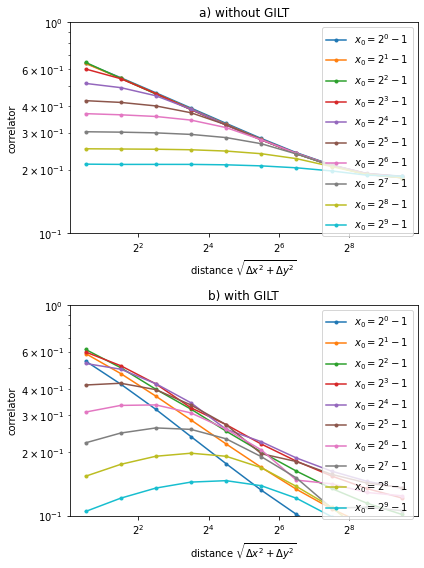

In [55]:
plt.figure(figsize=(6,8))

data=pd.read_pickle('data/hotrg_X24_smearing_between_edge_10.pkl')
data['start']=data['x0']+1
data['dist']=data['x1']-data['x0']
data['size']=np.maximum(data['start'],data['dist'])

plt.subplot(211)
for start in sorted(set(data['start'])):
    data_sel=data[data['start']==start]
    plt.plot(data_sel['dist']*(2**.5),data_sel['correlation'],'.-',label=r'$x_0=2^{'+str(int(np.log2(start)))+r'}-1$')
plt.legend(loc='upper right')
plt.xlabel('distance $\sqrt{\Delta x^2 + \Delta y^2}$')
plt.ylabel('correlator')
plt.ylim([.1,1])
plt.xscale(mpl.scale.LogScale('x',base=2))
plt.yscale('log')
plt.title('a) without GILT')



data=pd.read_pickle('data/hotrg_gilt_X24_smearing_between_edge_10.pkl')
data['start']=data['x0']+1
data['dist']=data['x1']-data['x0']
data['size']=np.maximum(data['start'],data['dist'])

plt.subplot(212)
for start in sorted(set(data['start'])):
    data_sel=data[data['start']==start]
    plt.plot(data_sel['dist']*(2**.5),data_sel['correlation'],'.-',label=r'$x_0=2^{'+str(int(np.log2(start)))+r'}-1$')
plt.legend(loc='upper right')
plt.xlabel('distance $\sqrt{\Delta x^2 + \Delta y^2}$')
plt.ylabel('correlator')
plt.ylim([.1,1])
plt.xscale(mpl.scale.LogScale('x',base=2))
plt.yscale('log')
plt.title('b) with GILT')


plt.tight_layout()
plt.show()

In [297]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

def firstSharedBlock(x1,y1,x2,y2):
    blockSize=1
    while x1!=x2 or y1!=y2:
        x1,y1,x2,y2=x1//2,y1//2,x2//2,y2//2
        blockSize*=2
    return blockSize
def whichAdjacentWay(x1,y1,x2,y2):
    blockSize=firstSharedBlock(x1,y1,x2,y2)//2
    X1,Y1,X2,Y2=x1//blockSize,y1//blockSize,x2//blockSize,y2//blockSize
    if Y1==Y2:
        return 0
    elif X1==X2:
        return 1
    else:
        return 2

def distToBlockBoundary(x,y,l):
    return min(x%l,y%l,l-x%l,l-y%l)
def fitWithHuberLoss(x,y,display=False):
    x,y=np.log(x),np.log(y)
    x=x.reshape(-1,1)
    model = HuberRegressor(epsilon=1)
    model.fit(x,y)
    test_x = np.array([np.min(x), np.max(x)]).reshape(-1,1)
    predictions = model.predict(test_x)
    if display:
        plt.scatter(x, y)
        plt.plot(test_x, predictions, 'r')
        plt.show()
    return model.coef_[0],model.intercept_

def fit_data_into_two_lines(xs,ys,plot=True):
    def loss(xs,ys,k1,b1,k2,b2):
        dist1=np.abs(ys-k1*xs-b1)**2
        dist2=np.abs(ys-k2*xs-b2)**2
        which=np.argmin([dist1,dist2],axis=0)
        return np.sum(dist1[which==0])+np.sum(dist2[which==1])
    # optimize loss function
    res=minimize(lambda x: loss(xs,ys,x[0],x[1],x[2],x[3]),[-1,0,0,-2],method='Nelder-Mead',tol=1e-6)
    k1,b1,k2,b2=res.x
    which=np.argmin([np.abs(ys-k1*xs-b1),np.abs(ys-k2*xs-b2)],axis=0)
    if plot:
        plt.plot(xs[which==0],ys[which==0],'.',color='red')
        plt.plot(xs[which==1],ys[which==1],'.',color='blue')
        plt.plot(xs,k1*xs+b1,color='red')
        plt.plot(xs,k2*xs+b2,color='blue')
        plt.show()
    return (k1,b1,k2,b2),which

fitted params:  -0.24144246579322695 -0.3639762667897757
scaling dimension without GILT:  0.12072123289661348


Text(0.5, 1.0, 'a) without GILT')

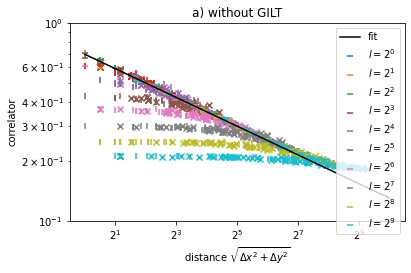

In [298]:


plt.figure(figsize=(6,8))
data=pd.read_pickle('data/hotrg_X24_smearing_between_edge_10_2.pkl')
data['dist']=((data['x1']-data['x0'])**2+(data['y1']-data['y0'])**2)**.5
data['size']=data.apply(lambda row: firstSharedBlock(row['x0'],row['y0'],row['x1'],row['y1'])//2,axis=1)
data['angle']=data.apply(lambda row: np.arctan2(np.abs(row['y1']-row['y0']),np.abs(row['x1']-row['x0'])),axis=1)
data['adj']=data.apply(lambda row: whichAdjacentWay(row['x0'],row['y0'],row['x1'],row['y1']),axis=1)
data=data.sort_values(by=['size','dist'])

k,b=fitWithHuberLoss(data['dist'].to_numpy(),data['correlation'].to_numpy())
print('fitted params: ',k,b)
print('scaling dimension without GILT: ',-k/2)
test_x=np.geomspace(1,1024,100)
test_y=np.exp(k*np.log(test_x)+b)

plt.subplot(211)

plt.plot(test_x,test_y,'black',label='fit')
for size in sorted(set(data['size'])):
    color=next(plt.gca()._get_lines.prop_cycler)['color']
    data_sel=data[np.logical_and(data['size']==size,data['adj']==0)]
    plt.scatter(data_sel['dist'],data_sel['correlation'],marker='_',color=color,label=r'$l=2^{'+str(int(np.log2(size)))+r'}$')
    data_sel=data[np.logical_and(data['size']==size,data['adj']==1)]
    plt.scatter(data_sel['dist'],data_sel['correlation'],color=color,marker='|')
    data_sel=data[np.logical_and(data['size']==size,data['adj']==2)]
    plt.scatter(data_sel['dist'],data_sel['correlation'],color=color,marker='x')

plt.legend(loc='upper right')
plt.xlabel('distance $\sqrt{\Delta x^2 + \Delta y^2}$')
plt.ylabel('correlator')
plt.ylim([.1,1])
plt.xscale(mpl.scale.LogScale('x',base=2))
plt.yscale('log')
plt.title('a) without GILT')


fitted params:  (-0.23242842994573737, -0.551050748771235, -0.028754211494478016, -2.13761269530788)
scaling dimension:  0.11621421497286868


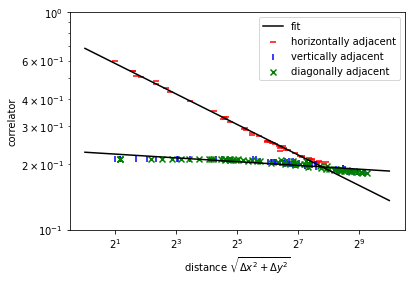

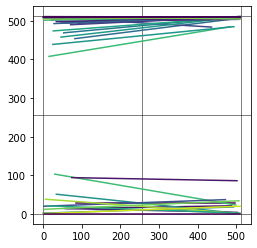

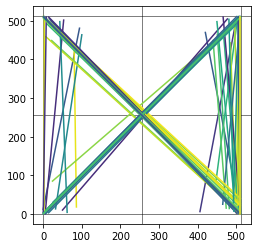

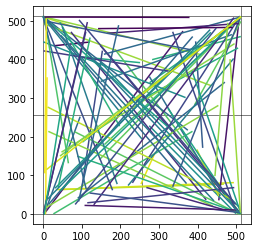

fitted params:  (-0.2118223184761885, -0.655432525776632, -0.030212407309088682, -1.9239629384339172)
scaling dimension:  0.10591115923809424


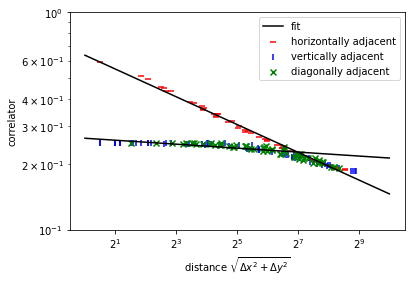

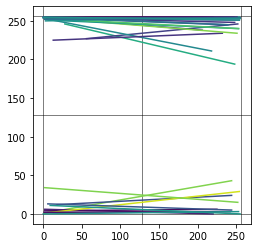

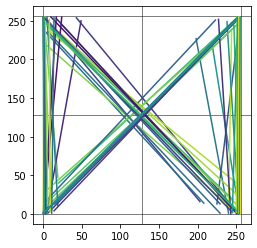

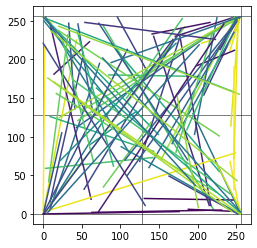

fitted params:  (-0.2298215938267582, -0.5689574589443861, -0.04649850723625693, -1.6249398234716415)
scaling dimension:  0.1149107969133791


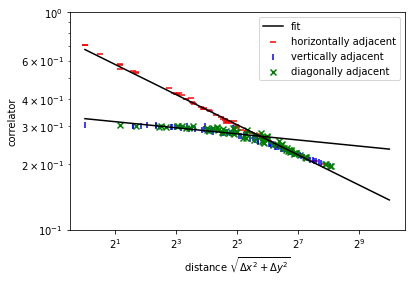

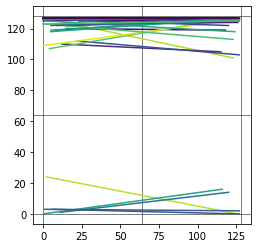

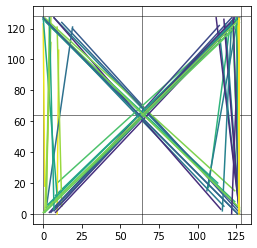

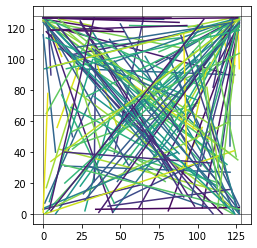

fitted params:  (-0.2321710049043705, -0.5674677168358899, -0.05891367073526518, -1.3617037390797297)
scaling dimension:  0.11608550245218525


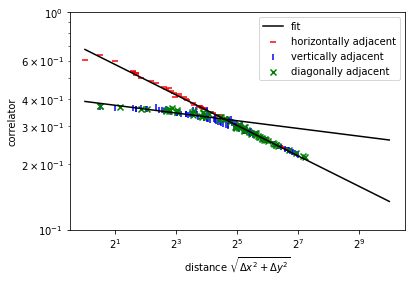

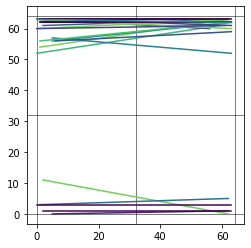

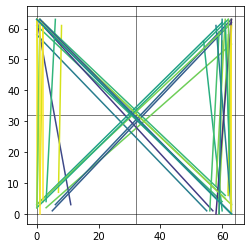

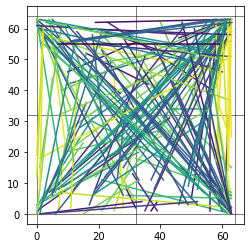

fitted params:  (-0.23988929262243475, -0.5361100437244898, -0.05920871455828014, -1.1816355546475874)
scaling dimension:  0.11994464631121737


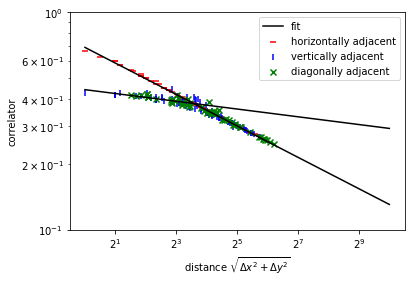

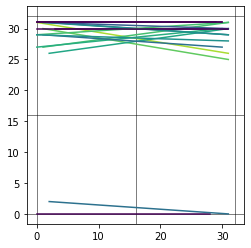

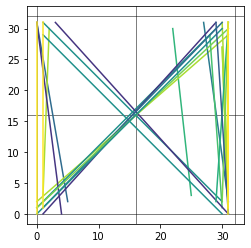

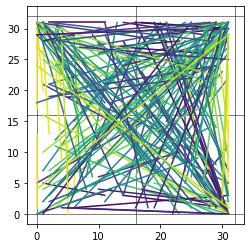

In [302]:
data=pd.read_pickle('data/hotrg_X24_smearing_between_edge_10_2.pkl')
data['dist']=((data['x1']-data['x0'])**2+(data['y1']-data['y0'])**2)**.5
data['size']=data.apply(lambda row: firstSharedBlock(row['x0'],row['y0'],row['x1'],row['y1'])//2,axis=1)
data['angle']=data.apply(lambda row: np.arctan2(np.abs(row['y1']-row['y0']),np.abs(row['x1']-row['x0'])),axis=1)
data['adj']=data.apply(lambda row: whichAdjacentWay(row['x0'],row['y0'],row['x1'],row['y1']),axis=1)

data=data.sort_values(by=['dist'],ascending=False)

for size in [512,256,128,64,32]:
    data_sel=data[data['size']==size].copy()
    args,which=fit_data_into_two_lines(np.log2(data_sel['dist']),np.log2(data_sel['correlation']),plot=False)
    # set the data points after the intersection to which==2
    cutoff=2**((args[1]-args[3])/(args[2]-args[0]))
    
    which[data_sel['dist']>.5*cutoff]=2
    print('fitted params: ',args)
    print('scaling dimension: ',-args[0]/2)
    data_sel['which']=which

    # draw the fitting
    text_x=np.geomspace(1,1024,100)
    text_y=np.exp2(args[0]*np.log2(text_x)+args[1])
    plt.plot(text_x,text_y,'black',label='fit')
    text_y=np.exp2(args[2]*np.log2(text_x)+args[3])
    plt.plot(text_x,text_y,'black')


    # draw by adj
    data_sel_sel=data_sel[data_sel['adj']==0]
    plt.scatter(data_sel_sel['dist'],data_sel_sel['correlation'],marker='_',color='red',label='horizontally adjacent')
    data_sel_sel=data_sel[data_sel['adj']==1]
    plt.scatter(data_sel_sel['dist'],data_sel_sel['correlation'],color='blue',marker='|',label='vertically adjacent')
    data_sel_sel=data_sel[data_sel['adj']==2]
    plt.scatter(data_sel_sel['dist'],data_sel_sel['correlation'],color='green',marker='x',label='diagonally adjacent')
    
    plt.legend(loc='upper right')

    plt.xlabel('distance $\sqrt{\Delta x^2 + \Delta y^2}$')
    plt.ylabel('correlator')
    plt.ylim([.1,1])
    plt.xscale(mpl.scale.LogScale('x',base=2))
    plt.yscale('log')

    plt.show()


    for which in [0,1,2]:
        # draw the correlators in block coord
        mysize=size
        for x in range(0,mysize+1,mysize//2):
            plt.axhline(y=x,color='black',linewidth=.5)
            plt.axvline(x=x,color='black',linewidth=.5)
        for row in data_sel.iterrows():
            # draw line x0y0-x1y1 using color which
            x0,y0,x1,y1=row[1]['x0'],row[1]['y0'],row[1]['x1'],row[1]['y1']
            x0,y0,x1,y1=x0%mysize,y0%mysize,x1%mysize,y1%mysize
            if row[1]['which']==which:
                #color=['red','blue','green'][which]
                # color on angle
                color=plt.cm.viridis((row[1]['angle']/(np.pi/2)))
                plt.plot([x0,x1],[y0,y1],color=color)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()



